# WEB SCRAPPING CAPSTONE PROJECT

Importing libraries

In [1]:
import re
import time
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as datetime

from time import sleep
from pytz import timezone
from dateutil import parser
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By  # Add this import
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import os
import urllib.request


pd.options.display.max_columns = None
pd.options.display.max_rows = None


# downloading files 

In [2]:
chrome_driver_path = r"C:\Users\SHILPA\Desktop\drivers"
download_file_path = r"C:\Users\SHILPA\RBI DATA"
prefs = {
    "download.default_directory": download_file_path,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True
}
options = webdriver.ChromeOptions()
options.add_argument(f"webdriver.chrome.driver={chrome_driver_path}")
driver = webdriver.Chrome(options=options)

base_url = "https://www.rbi.org.in/Scripts/BS_ViewBulletin.aspx?Id=22065"

# Open the base URL
driver.get(base_url)

# Replace 'start_year' and 'end_year' with the desired range (2022 to 2023)
start_year = 2018
end_year = 2023

for year in range(start_year, end_year + 1):
    print(f"Processing year {year}")

    # Construct the XPath dynamically based on the year for the year button
    year_button_xpath = f'//*[@id="btn{year}"]'

    try:
        # Click on the year button
        year_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, year_button_xpath))
        )
        year_button.click()

        # Wait for the page to load (adjust the time accordingly)
        WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.XPATH, '//*[@id="doublescroll"]'))
        )

        # Construct the XPath dynamically based on the year for the "All Months" button
        all_months_button_xpath = f'//*[@id="{year}0"]'

        # Find the "All Months" button
        all_months_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, all_months_button_xpath))
        )

        # Click on the "All Months" button
        all_months_button.click()

        # Wait for the "All Months" button to be present in the new state
        WebDriverWait(driver, 20).until(
            EC.staleness_of(all_months_button)
        )
    except Exception as e:
        print(f"Error processing year {year}: {e}")
        continue
         # Replace with the actual link text
    try: 
        # Find the link element by link text
        link_text_element = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.LINK_TEXT, '4. Sale/Purchase of U.S. Dollar by the RBI'))
        )

        # Click on the link
        link_text_element.click()

        link_url = driver.execute_script(
            'return document.querySelector("#doublescroll table tbody tr:nth-child(1) td a").getAttribute("href");'
        )

        # Download the file using urllib.request
        excel_file_name = f"your_excel_file_{year}.xlsx"  # Change to the desired file name
        excel_file_path = os.path.join(download_file_path, excel_file_name)
        urllib.request.urlretrieve(link_url, excel_file_path)

        # Now, excel_file_path contains the path to the downloaded Excel file
        # You can read it using pandas
        df = pd.read_excel(excel_file_path)

    except Exception as e:
        print(f"Error clicking link for {year}: {e}")
        continue

# Close the browser
driver.quit()

        

Processing year 2018
Processing year 2019
Processing year 2020
Processing year 2021
Processing year 2022
Processing year 2023


In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,No. 4: Sale/ Purchase of U.S. Dollar by the RBI,NaN,NaN,NaN,NaN
1,NaN,i) Operations in onshore / offshore OTC segment,NaN,NaN,NaN,NaN
2,NaN,Item,2022-23,2022,2023,NaN
3,NaN,NaN,NaN,Sep.,Aug.,Sep.
4,NaN,NaN,1,2,3,4
5,NaN,1 Net Purchase/ Sale of Foreign Currency (US $...,-25516,-10361,-3856,-1508
6,NaN,1.1 Purchase (+),187054,23265,500,27757
7,NaN,1.2 Sale (–),212570,33626,4356,29265
8,NaN,2 ₹ equivalent at contract rate (₹ Crores),-217259,-85132,31994,-12611
9,NaN,3 Cumulative (over end-March) (US $ Million),-25516,-33417,19195,17687


# data processing

processing every year data

In [4]:
import os
import pandas as pd

# Set the path to the folder containing all downloaded Excel files
downloaded_files_folder = r"C:\Users\SHILPA\RBI DATA"

# Specify the years for which you want to extract the top and bottom rows
target_years = {2018: None, 2019: None, 2020: None, 2021: None, 2022: None, 2023: None}

# Column name mapping
new_column_names = {'Unnamed: 1': 'item',
                    'Unnamed: 2': 'Qtr1',
                    'Unnamed: 3': 'Qtr2',
                    'Unnamed: 4': 'Qtr3',
                    'Unnamed: 5': 'Qtr4'}

# Initialize dictionaries to store top and bottom rows separately for each year
otc = {year: None for year in target_years}
futures = {year: None for year in target_years}

# Iterate through all files in the folder
for file_name in os.listdir(downloaded_files_folder):
    if file_name.endswith(".xlsx"):
        file_path = os.path.join(downloaded_files_folder, file_name)

        try:
            # Read the Excel file into a DataFrame
            df = pd.read_excel(file_path)

            # Remove the first five rows
            df_cleaned = df.iloc[5:]

            # Check if the file corresponds to the target years
            year = int(file_name.split('_')[3].split('.')[0])
            if year in target_years:
                # Extract the top 7 rows for the specified years
                top_rows = df_cleaned.head(7)
                
                top_rows = top_rows.drop(columns=['Unnamed: 0'])

                # Check if there are at least 9 rows in the DataFrame for bottom rows
                if len(df_cleaned) >= 9:
                    # Remove the top two rows from the bottom rows
                    bottom_rows = df_cleaned.tail(7).iloc[2:-1]
                    
                    bottom_rows = bottom_rows.drop(columns=['Unnamed: 0'])

                    # Rename columns in both DataFrames
                    bottom_rows = bottom_rows.rename(columns=new_column_names)
                    bottom_rows = bottom_rows.transpose()  # Transpose the DataFrame
                    bottom_rows.columns = bottom_rows.iloc[0]  # Use the first row as header
                    bottom_rows = bottom_rows.iloc[1:]  # Skip the first row

                    # Store the bottom rows in the corresponding year's dictionary
                    futures[year] = bottom_rows

                # Rename columns in the top rows DataFrame
                top_rows = top_rows.rename(columns=new_column_names)
                top_rows = top_rows.transpose()  # Transpose the DataFrame
                top_rows.columns = top_rows.iloc[0]  # Use the first row as header
                top_rows = top_rows.iloc[1:]  # Skip the first row

                # Store the top rows in the corresponding year's dictionary
                otc[year] = top_rows

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")
            continue

# View the DataFrames for each year
for year, top_rows in otc.items():
    print(f"\nTop Rows for {year}:")
    print(top_rows)

for year, bottom_rows in futures.items():
    print(f"\nBottom Rows for {year}:")
    print(bottom_rows)



Top Rows for 2018:
item 1 Net Purchase/ Sale of Foreign Currency (US $ Million) (1.1–1.2)  \
Qtr1                                              33689                  
Qtr2                                                852                  
Qtr3                                             –31.00                  
Qtr4                                          –7,204.00                  

item 1.1 Purchase (+) 1.2 Sale (–)  \
Qtr1            52068        18379   
Qtr2             1910         1058   
Qtr3             1012         1043   
Qtr4              945         8149   

item 2 ₹ equivalent at contract rate (₹ Billion)  \
Qtr1                                     2228.28   
Qtr2                                       57.31   
Qtr3                                       –6.72   
Qtr4                                     –536.10   

item 3 Cumulative (over end-March) (US $ Million)  \
Qtr1                                        33689   
Qtr2                                        17153  

In [5]:
top_rows.head()

item,1 Net Purchase/ Sale of Foreign Currency (US $ Million) (1.1-1.2),1.1 Purchase (+),1.2 Sale (–),2 ₹ equivalent at contract rate (₹ Crores),3 Cumulative (over end-March) (US $ Million),(₹ Crore),4 Outstanding Net Forward Sales (-)/ Purchase (+) at the end of month (US $ Million)
Qtr1,-25516,187054,212570,-217259,-25516,-217259,23600
Qtr2,-10361,23265,33626,-85132,-33417,-273554,10423
Qtr3,-3856,500,4356,31994,19195,157279,10068
Qtr4,-1508,27757,29265,-12611,17687,144667,4642


In [6]:
bottom_rows.head()

item,1 Net Purchase/ Sale of Foreign Currency (US $ Million) (1.1-1.2),1.1 Purchase (+),1.2 Sale (–),2 Outstanding Net Currency Futures Sales (-)/ Purchase (+) at the end of month (US $ Million)
Qtr1,0,10930,10930,0
Qtr2,0,895,895,-1460
Qtr3,0,441,441,0
Qtr4,0,1598,1598,-1725


## concatenating all years values

In [7]:
# Combine top rows for all years
combined_otc = pd.concat(otc.values(), keys=otc.keys(), names=['Year'])

# Combine bottom rows for all years
combined_futures = pd.concat(futures.values(), keys=futures.keys(), names=['Year'])

# View the combined DataFrames
print("\nCombined Top Rows:")
print(combined_otc)

print("\nCombined Bottom Rows:")
print(combined_futures)



Combined Top Rows:
item      1 Net Purchase/ Sale of Foreign Currency (US $ Million) (1.1–1.2)  \
Year                                                                          
2018 Qtr1                                              33689                  
     Qtr2                                                852                  
     Qtr3                                             –31.00                  
     Qtr4                                          –7,204.00                  
2019 Qtr1                                             -15377                  
     Qtr2                                              -7204                  
     Qtr3                                               5614                  
     Qtr4                                               7102                  
2020 Qtr1                                              45097                  
     Qtr2                                               7102                  
     Qtr3                       

In [8]:
# Replace NaN values with 0 in combined DataFrames
combined_otc_filled = combined_otc.fillna(0)
combined_futures_filled = combined_futures.fillna(0)

# View the filled DataFrames
print("\nCombined Top Rows (Filled):")
print(combined_otc_filled)

print("\nCombined Bottom Rows (Filled):")
print(combined_futures_filled)



Combined Top Rows (Filled):
item      1 Net Purchase/ Sale of Foreign Currency (US $ Million) (1.1–1.2)  \
Year                                                                          
2018 Qtr1                                              33689                  
     Qtr2                                                852                  
     Qtr3                                             –31.00                  
     Qtr4                                          –7,204.00                  
2019 Qtr1                                             -15377                  
     Qtr2                                              -7204                  
     Qtr3                                               5614                  
     Qtr4                                               7102                  
2020 Qtr1                                              45097                  
     Qtr2                                               7102                  
     Qtr3              

In [2]:
import os
import tkinter as tk
from tkinter import ttk
from tkinter import filedialog
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import urllib.request
import pandas as pd

class RBIWebScraperGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("RBI Web Scraper")

        # Variables
        self.chrome_driver_path = tk.StringVar()
        self.download_file_path = tk.StringVar()
        self.start_year = tk.StringVar()
        self.end_year = tk.StringVar()

        # Set default values
        self.chrome_driver_path.set(r"C:\Users\SHILPA\Desktop\drivers")
        self.download_file_path.set(r"C:\Users\SHILPA\RBI DATA")
        self.start_year.set("2018")
        self.end_year.set("2023")

        # Create and place widgets
        self.create_widgets()

    def create_widgets(self):
        # Labels
        tk.Label(self.root, text="Chrome Driver Path:").grid(row=0, column=0, sticky="w", padx=10, pady=5)
        tk.Label(self.root, text="Download File Path:").grid(row=1, column=0, sticky="w", padx=10, pady=5)
        tk.Label(self.root, text="Start Year:").grid(row=2, column=0, sticky="w", padx=10, pady=5)
        tk.Label(self.root, text="End Year:").grid(row=3, column=0, sticky="w", padx=10, pady=5)

        # Entry widgets
        ttk.Entry(self.root, textvariable=self.chrome_driver_path, width=40).grid(row=0, column=1, padx=10, pady=5)
        ttk.Entry(self.root, textvariable=self.download_file_path, width=40).grid(row=1, column=1, padx=10, pady=5)
        ttk.Entry(self.root, textvariable=self.start_year, width=10).grid(row=2, column=1, padx=10, pady=5)
        ttk.Entry(self.root, textvariable=self.end_year, width=10).grid(row=3, column=1, padx=10, pady=5)

        # Buttons
        ttk.Button(self.root, text="Browse", command=self.browse_chrome_driver).grid(row=0, column=2, padx=5, pady=5)
        ttk.Button(self.root, text="Browse", command=self.browse_download_path).grid(row=1, column=2, padx=5, pady=5)
        ttk.Button(self.root, text="Run Scraper", command=self.run_scraper).grid(row=4, column=0, columnspan=3, pady=10)

    def browse_chrome_driver(self):
        path = filedialog.askdirectory()
        if path:
            self.chrome_driver_path.set(path)

    def browse_download_path(self):
        path = filedialog.askdirectory()
        if path:
            self.download_file_path.set(path)

    def run_scraper(self):
        chrome_driver_path = self.chrome_driver_path.get()
        download_file_path = self.download_file_path.get()
        start_year = int(self.start_year.get())
        end_year = int(self.end_year.get())

        # Rest of your code...

if __name__ == "__main__":
    root = tk.Tk()
    app = RBIWebScraperGUI(root)
    root.mainloop()


# plotting a bar graph

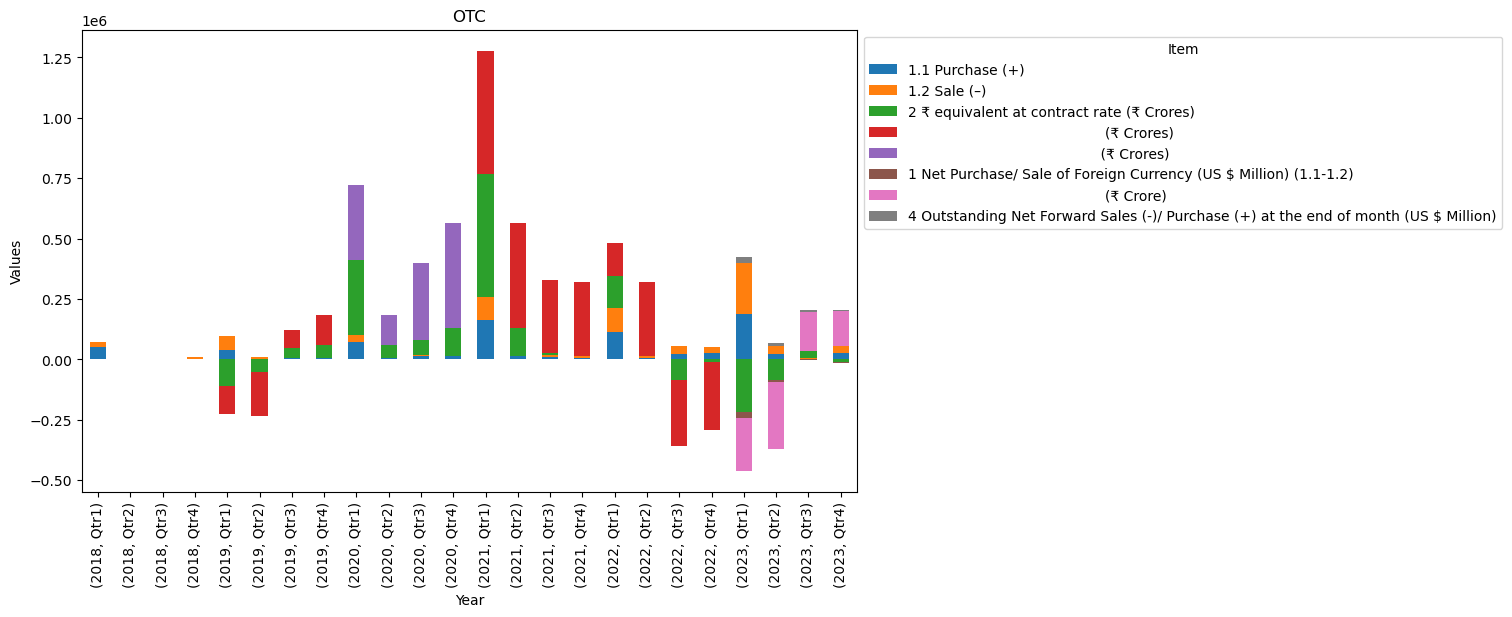

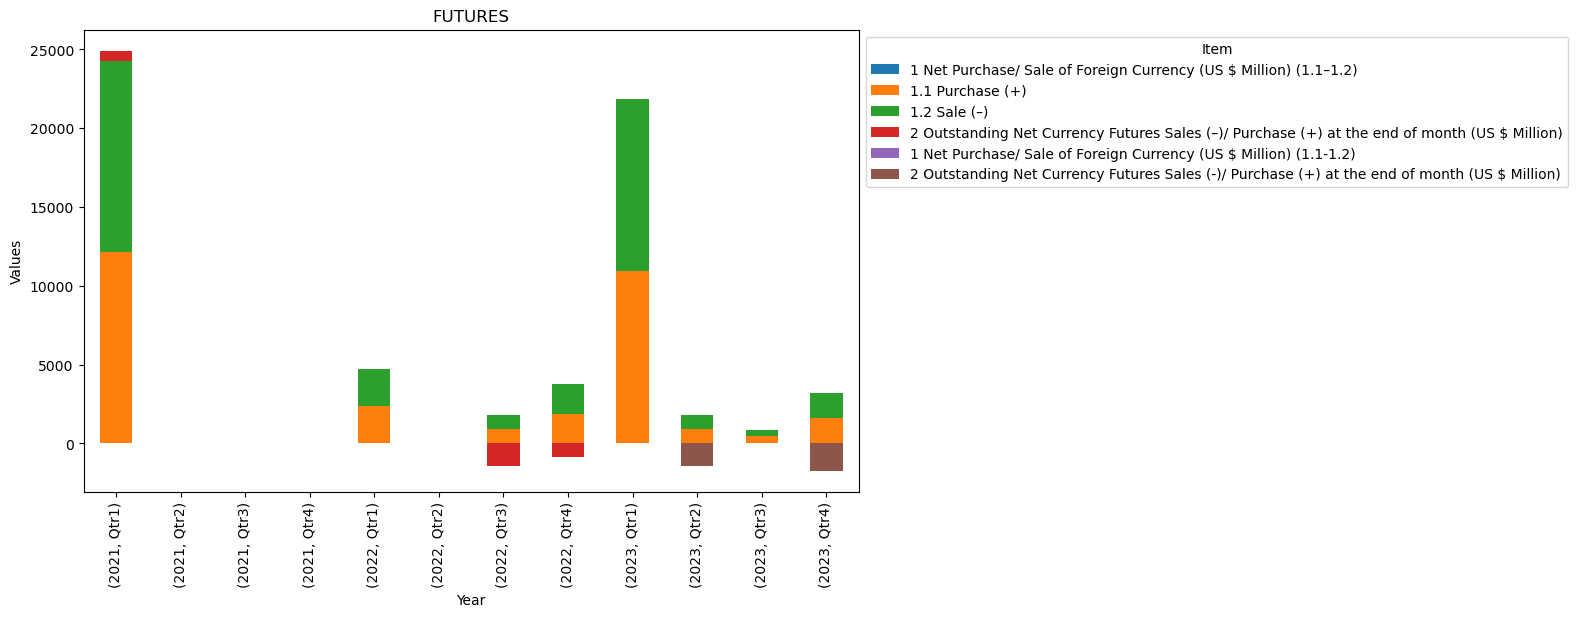

In [9]:
import matplotlib.pyplot as plt

# Create a bar plot for combined top rows
combined_otc_filled.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('OTC')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.show()

# Create a bar plot for combined bottom rows
combined_futures_filled.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('FUTURES')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.show()
